# Aujourd'hui on se fait rouler par les mecs de l'ENS


https://challengedata.ens.fr/en/challenge/39/prediction_of_transaction_claims_status.html


Donc là on fait plein de viz, vers le fond c'est le bazar, puisque c'est toujours vers les pieds de notebooks que je colle mes nippets de code pas ouf, mais qui ont du potentiel

# Imports des librairies de bases

On ajoutera celles qui manquent au fur et à mesure de nos besoins

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os, gc
import seaborn as sns

# Définition de la seed pour le random

Très important pour qu'on voit les mêmes choses entre nos deux ordis

In [2]:
RANDOM_SEED = 42;
np.random.seed(RANDOM_SEED)

# Définition des paramètres pour Matplot

Rien de bien intéréssant

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Set des variables globales

Attention, je n'utilise les variables globales pour la gestion des fichiers. Sinon, c'est mort

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data")
DATA_PROCESSED = os.path.join(PROJECT_ROOT_DIR, "data_processed")

# Fonction pour load les libraires

En vrai, on a juste besoin de pd.read_csv, mais c'était pour faire joli

In [5]:
def load_data(file,data_path=DATA_PATH, sep=','):
    csv_path = os.path.join(data_path, file)
    return pd.read_csv(csv_path, sep)

# On load les jeux de données

Seulement le train (input_train) pour le moment. Et le "Y" des lignes dans le fichier avec le long nom.
Je ne sais pas pourquoi ils ont tout divisé, mais peût être pour filter les mecs qui ne savent pas fire des jointures.

In [6]:
TX_data = load_data(file = "input_train.csv");
STA_data = load_data(file = "challenge_output_data_training_file_prediction_of_transaction_claims_status.csv", sep=';');


# Jointure entre les X et Y

In [7]:
# Merge de TX_data et STA_data en utilisant les index comme cléf primaire
TX_data = pd.merge(TX_data, STA_data, left_index=True, right_index=True)

# On drop les ID qui sont crée dans le processus
TX_data.drop(["ID_y","ID_x"],inplace=True,axis=1)

# On applique tout ce qui peut l'être en numérique
TX_data=TX_data.apply(pd.to_numeric, errors='ignore')

del STA_data #Je supprime toujours les variables inutiles pour liberer ma RAM (qui est très faible)

In [8]:
TX_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
SHIPPING_MODE           99685 non-null object
SHIPPING_PRICE          32390 non-null object
WARRANTIES_FLG          100000 non-null bool
WARRANTIES_PRICE        3397 non-null object
CARD_PAYMENT            100000 non-null int64
COUPON_PAYMENT          100000 non-null int64
RSP_PAYMENT             100000 non-null int64
WALLET_PAYMENT          100000 non-null int64
PRICECLUB_STATUS        99943 non-null object
REGISTRATION_DATE       100000 non-null int64
PURCHASE_COUNT          100000 non-null object
BUYER_BIRTHDAY_DATE     94164 non-null float64
BUYER_DEPARTMENT        100000 non-null int64
BUYING_DATE             100000 non-null object
SELLER_SCORE_COUNT      99994 non-null object
SELLER_SCORE_AVERAGE    99994 non-null float64
SELLER_COUNTRY          100000 non-null object
SELLER_DEPARTMENT       100000 non-null int64
PRODUCT_TYPE            100000 non-null object
PRODUCT_FAMI

In [9]:
TX_data.SHIPPING_MODE = TX_data.SHIPPING_MODE.astype('category')
TX_data.PRICECLUB_STATUS = TX_data.PRICECLUB_STATUS.astype('category')
TX_data.SELLER_COUNTRY = TX_data.SELLER_COUNTRY.astype('category')
TX_data.PRODUCT_TYPE = TX_data.PRODUCT_TYPE.astype('category')
TX_data.PRODUCT_FAMILY = TX_data.PRODUCT_FAMILY.astype('category')

In [10]:
def b( row):
            return 0 if row['CLAIM_TYPE'] == '-' else 1;

In [11]:
TX_data['IS_CLAIM'] = TX_data.apply(b, axis=1)

# DATA VIZ : Analyse des tendances centrales

In [12]:
def simple_describer_categorial(data, target):
    X=data.copy()
    print(target+" DESCRIBE    ____________________________________________\n")
    print(X[target].describe());
    print("\n\n"+target+" STAT ____________________________________________\n")
    temp=X['IS_CLAIM'].groupby(TX_data[target]).describe().reset_index()
    temp.columns=[target,"count","mean","std","t_1","t_2","t_3","t_4","t_5"]
    temp.drop(["t_1","t_2","t_3","t_4","t_5"], axis=1, inplace=True)
    temp.sort_values(by="mean",ascending=False, inplace=True)
    print(temp)
    print("\n\n"+target+" MEAN     _____________________________________________\n")
    sns.barplot(y=target, 
              x="mean", 
              data=temp, 
              palette="Greens_d")

In [13]:
def simple_describer_bool(data, target):
    X=data.copy()
    print(target+" DESCRIBE    ____________________________________________\n")
    print(X[target].describe());
    print("\n\n"+target+" STAT ____________________________________________\n")
    temp=X['IS_CLAIM'].groupby(TX_data[target]).describe().reset_index()
    temp.columns=[target,"count","mean","std","t_1","t_2","t_3","t_4","t_5"]
    temp.drop(["t_1","t_2","t_3","t_4","t_5"], axis=1, inplace=True)
    temp.sort_values(by="mean",ascending=False, inplace=True)
    print(temp)
    print("\n\n"+target+" MEAN     _____________________________________________\n")
    sns.barplot(y="mean",
              data=temp, 
              palette="Greens_d")

### SHIPPING_MODE           99685 non-null object

SHIPPING_MODE DESCRIBE    ____________________________________________

count      99685
unique        11
top       NORMAL
freq       66592
Name: SHIPPING_MODE, dtype: object


SHIPPING_MODE STAT ____________________________________________

            SHIPPING_MODE    count      mean       std
2                   Kiala      2.0  1.000000  0.000000
6                  PICKUP    101.0  0.732673  0.444772
7              RECOMMANDE  18585.0  0.628787  0.483142
1        EXPRESS_DELIVERY    379.0  0.593668  0.491797
0              CHRONOPOST    151.0  0.569536  0.496789
3           MONDIAL_RELAY   2238.0  0.547364  0.497863
9           SO_RECOMMANDE    771.0  0.514916  0.500102
8         SO_POINT_RELAIS   2175.0  0.508966  0.500035
5                  NORMAL  66592.0  0.467729  0.498961
4   MONDIAL_RELAY_PREPAYE   1736.0  0.452765  0.497907
10                  SUIVI   6955.0  0.450180  0.497548


SHIPPING_MODE MEAN     _____________________________________________



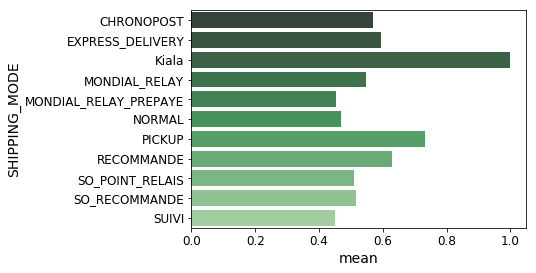

In [14]:
simple_describer_categorial(TX_data, "SHIPPING_MODE")

#### Analyse:
Je ne comprends pas pourquoi cette légère tendance.

Aller chercher son colis, ou se le faire livrer chez soi ne semble pas apporter quelque chose

### SHIPPING_PRICE          32390 non-null object

SHIPPING_PRICE DESCRIBE    ____________________________________________

count     32390
unique        5
top         1<5
freq      17003
Name: SHIPPING_PRICE, dtype: object


SHIPPING_PRICE STAT ____________________________________________

  SHIPPING_PRICE    count      mean       std
4            >20    244.0  0.758197  0.429056
0          10<20   1335.0  0.649438  0.477325
2           5<10   7196.0  0.551278  0.497398
3             <1   6612.0  0.458711  0.498330
1            1<5  17003.0  0.442098  0.496651


SHIPPING_PRICE MEAN     _____________________________________________



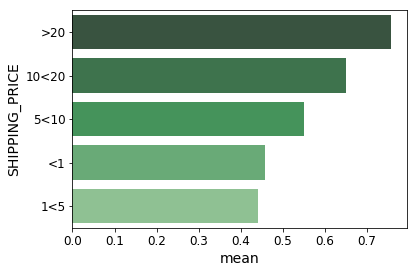

In [15]:
simple_describer_categorial(TX_data, "SHIPPING_PRICE")

#### Analyse:

Il semble que des frais d'envois chers créent des claims. Mais c'est peût être pas significatif, en effet, il y a quand même peu de vente avec des frais chers

### WARRANTIES_FLG          100000 non-null bool

WARRANTIES_FLG DESCRIBE    ____________________________________________

count     100000
unique         2
top        False
freq       96603
Name: WARRANTIES_FLG, dtype: object


WARRANTIES_FLG STAT ____________________________________________

   WARRANTIES_FLG    count      mean       std
1            True   3397.0  0.596997  0.490574
0           False  96603.0  0.496827  0.499993


WARRANTIES_FLG MEAN     _____________________________________________



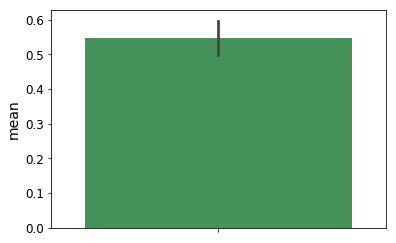

In [16]:
simple_describer_bool(TX_data, "WARRANTIES_FLG")

#### Analyse:

Avoir une garantie semble ajouter légèrement de la proba de claims

### WARRANTIES_PRICE        3397 non-null object


WARRANTIES_PRICE DESCRIBE    ____________________________________________

count     3397
unique       5
top         <5
freq      2305
Name: WARRANTIES_PRICE, dtype: object


WARRANTIES_PRICE STAT ____________________________________________

  WARRANTIES_PRICE   count      mean       std
2           50<100   178.0  0.719101  0.450706
1            20<50   336.0  0.702381  0.457893
3             5<20   567.0  0.686067  0.464499
4               <5  2305.0  0.550542  0.497547
0          100<500    11.0  0.545455  0.522233


WARRANTIES_PRICE MEAN     _____________________________________________



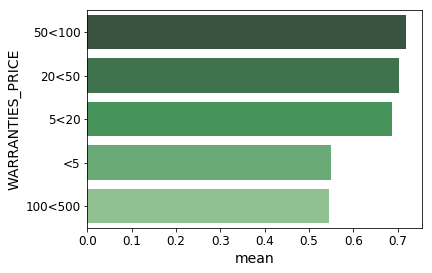

In [17]:
simple_describer_categorial(TX_data, "WARRANTIES_PRICE")

#### Analyse:

C'est pas clair pourquoi soit les toutes petites ou soit les très grosses sont si faibles. En revanche avoir une garantie donne tendance à faire une Claim.

Ou pourrait transformer ça en variable binaire : 50<100 et 20<50 et 5<20 à 1, les deux autres à 0

### CARD_PAYMENT            100000 non-null int64

In [18]:
TX_data.CARD_PAYMENT=TX_data.CARD_PAYMENT.astype('bool')

CARD_PAYMENT DESCRIBE    ____________________________________________

count     100000
unique         2
top         True
freq       89593
Name: CARD_PAYMENT, dtype: object


CARD_PAYMENT STAT ____________________________________________

   CARD_PAYMENT    count      mean       std
0         False  10407.0  0.511867  0.499883
1          True  89593.0  0.498878  0.500002


CARD_PAYMENT MEAN     _____________________________________________



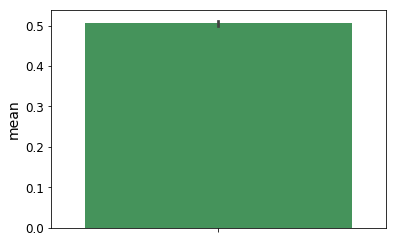

In [19]:
simple_describer_bool(TX_data, "CARD_PAYMENT")

#### Analyse

Franchement, 50% et en plus uns STD si faible? Ca dégage

### COUPON_PAYMENT          100000 non-null int64


In [20]:
TX_data.COUPON_PAYMENT=TX_data.COUPON_PAYMENT.astype('bool')

COUPON_PAYMENT DESCRIBE    ____________________________________________

count     100000
unique         2
top        False
freq       94271
Name: COUPON_PAYMENT, dtype: object


COUPON_PAYMENT STAT ____________________________________________

   COUPON_PAYMENT    count      mean       std
1            True   5729.0  0.520335  0.499630
0           False  94271.0  0.499008  0.500002


COUPON_PAYMENT MEAN     _____________________________________________



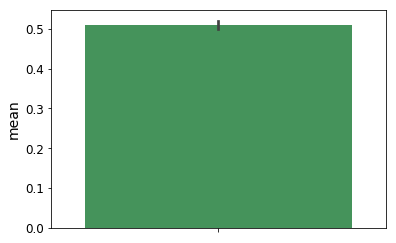

In [21]:
simple_describer_bool(TX_data, "COUPON_PAYMENT")

#### Analyse

Franchement, 50% et en plus uns STD si faible? Ca dégage

### RSP_PAYMENT             100000 non-null int64


In [22]:
TX_data.RSP_PAYMENT=TX_data.RSP_PAYMENT.astype('bool')

RSP_PAYMENT DESCRIBE    ____________________________________________

count     100000
unique         2
top        False
freq       82942
Name: RSP_PAYMENT, dtype: object


RSP_PAYMENT STAT ____________________________________________

   RSP_PAYMENT    count      mean       std
0        False  82942.0  0.502267  0.499998
1         True  17058.0  0.490327  0.499921


RSP_PAYMENT MEAN     _____________________________________________



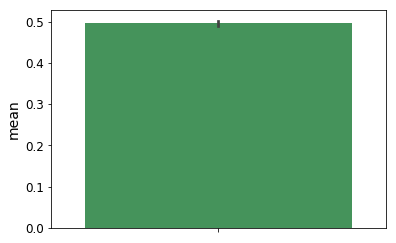

In [23]:
simple_describer_bool(TX_data, "RSP_PAYMENT")

#### Analyse

Franchement, 50% et en plus uns STD si faible? Ca dégage

### WALLET_PAYMENT          100000 non-null int64


In [24]:
TX_data.WALLET_PAYMENT=TX_data.WALLET_PAYMENT.astype('bool')

WALLET_PAYMENT DESCRIBE    ____________________________________________

count     100000
unique         2
top        False
freq       87045
Name: WALLET_PAYMENT, dtype: object


WALLET_PAYMENT STAT ____________________________________________

   WALLET_PAYMENT    count      mean       std
1            True  12955.0  0.500965  0.500018
0           False  87045.0  0.500121  0.500003


WALLET_PAYMENT MEAN     _____________________________________________



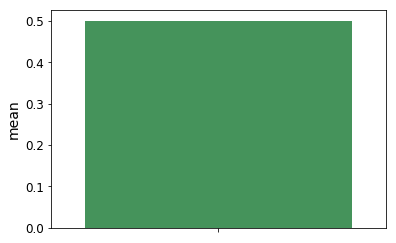

In [25]:
simple_describer_bool(TX_data, "WALLET_PAYMENT")

#### Analyse

Franchement, 50% et en plus uns STD inexistante? Ca dégage

### PRICECLUB_STATUS        99943 non-null object


PRICECLUB_STATUS DESCRIBE    ____________________________________________

count            99943
unique               5
top       UNSUBSCRIBED
freq             61524
Name: PRICECLUB_STATUS, dtype: object


PRICECLUB_STATUS STAT ____________________________________________

  PRICECLUB_STATUS    count      mean       std
2          REGULAR  11574.0  0.556506  0.496818
3           SILVER   3725.0  0.511946  0.499924
4     UNSUBSCRIBED  61524.0  0.500861  0.500003
0             GOLD   5609.0  0.496880  0.500035
1         PLATINUM  17511.0  0.459083  0.498337


PRICECLUB_STATUS MEAN     _____________________________________________



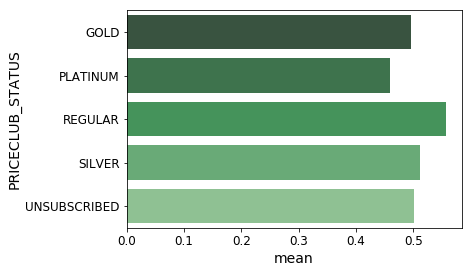

In [26]:
simple_describer_categorial(TX_data, "PRICECLUB_STATUS")

#### Analyse:

Franchement, je pense que ce n'est qu'une bête variation statistique cet effet. Tout le monde est autour de 50%

### REGISTRATION_DATE       100000 non-null int64


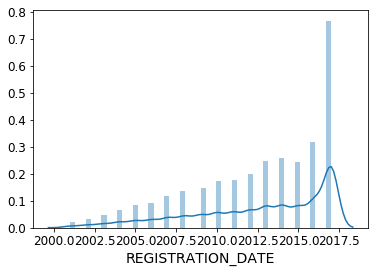

In [28]:
sns.distplot(TX_data.REGISTRATION_DATE);

#### Analyse:

Beaucoup de nouveaux arrivants

REGISTRATION_DATE DESCRIBE    ____________________________________________

count    100000.000000
mean       2012.595230
std           4.201691
min        2001.000000
25%        2010.000000
50%        2014.000000
75%        2016.000000
max        2017.000000
Name: REGISTRATION_DATE, dtype: float64


REGISTRATION_DATE STAT ____________________________________________

    REGISTRATION_DATE    count      mean       std
16               2017  24561.0  0.534913  0.498790
13               2014   8230.0  0.519927  0.499633
15               2016  10176.0  0.517689  0.499712
14               2015   7772.0  0.511065  0.499910
12               2013   7929.0  0.506495  0.499989
11               2012   6322.0  0.480228  0.499648
9                2010   5547.0  0.479899  0.499641
4                2005   2645.0  0.474480  0.499443
6                2007   3733.0  0.469595  0.499142
8                2009   4739.0  0.467609  0.499002
7                2008   4334.0  0.467236  0.498983
10               

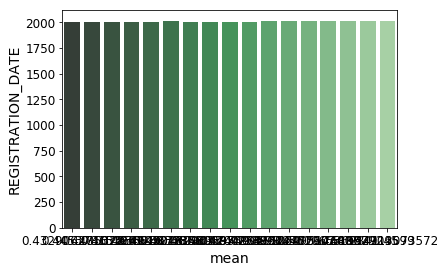

In [29]:
simple_describer_categorial(TX_data, "REGISTRATION_DATE")

#### Analyse

J'ai envie de dire que plus tu es un vieux client, moins tu te plains

### PURCHASE_COUNT          100000 non-null object


PURCHASE_COUNT DESCRIBE    ____________________________________________

count     100000
unique         6
top           <5
freq       42802
Name: PURCHASE_COUNT, dtype: object


PURCHASE_COUNT STAT ____________________________________________

  PURCHASE_COUNT    count      mean       std
4             <5  42802.0  0.559226  0.496486
3           5<20  19510.0  0.493183  0.499966
1          20<50  12648.0  0.456989  0.498166
2         50<100   8821.0  0.443034  0.496772
0        100<500  12347.0  0.421884  0.493880
5           >500   3872.0  0.404959  0.490947


PURCHASE_COUNT MEAN     _____________________________________________



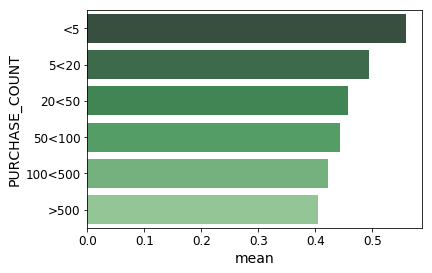

In [30]:
simple_describer_categorial(TX_data, "PURCHASE_COUNT")

#### Analyse:

Moins la personne a acheté, plus elle va péter les bonbons. Attention, cette variable doit être mille fois colinéaire avec la date d'entrée

### BUYER_BIRTHDAY_DATE     94164 non-null float64


BUYER_BIRTHDAY_DATE DESCRIBE    ____________________________________________

count    94164.000000
mean      1976.129912
std         14.127001
min       1900.000000
25%       1967.000000
50%       1977.000000
75%       1987.000000
max       2016.000000
Name: BUYER_BIRTHDAY_DATE, dtype: float64


BUYER_BIRTHDAY_DATE STAT ____________________________________________

     BUYER_BIRTHDAY_DATE   count      mean       std
12                1919.0     2.0  1.000000  0.000000
3                 1903.0     1.0  1.000000       NaN
19                1927.0     1.0  1.000000       NaN
6                 1906.0    10.0  0.800000  0.421637
18                1926.0     5.0  0.800000  0.447214
1                 1901.0    16.0  0.750000  0.447214
13                1920.0     3.0  0.666667  0.577350
106               2016.0     5.0  0.600000  0.547723
93                2001.0   105.0  0.600000  0.492248
15                1922.0     5.0  0.600000  0.547723
90                1998.0  1624.0  0.590517  0.49

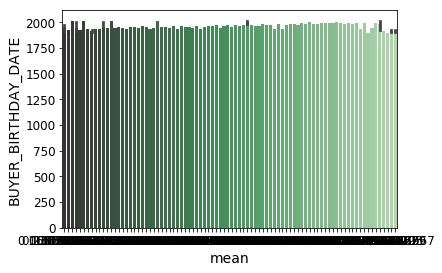

In [32]:
simple_describer_categorial(TX_data, "BUYER_BIRTHDAY_DATE")

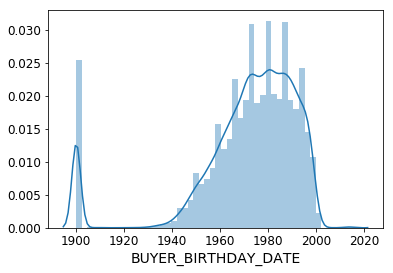

In [33]:
sns.distplot(TX_data.BUYER_BIRTHDAY_DATE.fillna(1900, inplace=False));

#### Analyse

Classique, des données manquantes (mes 1900), et des données abhérantes comme des gars trés jeunes (2 ans les pépères).

Mais en moyenne, c'est des vieux croutons qui se promènent sur le site (1976)

BUYER_BIRTHDAY_DATE DESCRIBE    ____________________________________________

count    94164.000000
mean      1976.129912
std         14.127001
min       1900.000000
25%       1967.000000
50%       1977.000000
75%       1987.000000
max       2016.000000
Name: BUYER_BIRTHDAY_DATE, dtype: float64


BUYER_BIRTHDAY_DATE STAT ____________________________________________

     BUYER_BIRTHDAY_DATE   count      mean       std
12                1919.0     2.0  1.000000  0.000000
3                 1903.0     1.0  1.000000       NaN
19                1927.0     1.0  1.000000       NaN
6                 1906.0    10.0  0.800000  0.421637
18                1926.0     5.0  0.800000  0.447214
1                 1901.0    16.0  0.750000  0.447214
13                1920.0     3.0  0.666667  0.577350
106               2016.0     5.0  0.600000  0.547723
93                2001.0   105.0  0.600000  0.492248
15                1922.0     5.0  0.600000  0.547723
90                1998.0  1624.0  0.590517  0.49

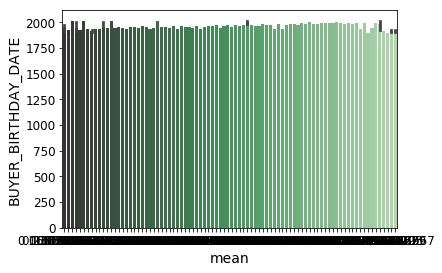

In [34]:
simple_describer_categorial(TX_data, "BUYER_BIRTHDAY_DATE")

### BUYER_DEPARTMENT        100000 non-null int64


BUYER_DEPARTMENT DESCRIBE    ____________________________________________

count    100000.000000
mean         54.280890
std          27.864038
min          -1.000000
25%          32.000000
50%          59.000000
75%          77.000000
max          98.000000
Name: BUYER_DEPARTMENT, dtype: float64


BUYER_DEPARTMENT STAT ____________________________________________

    BUYER_DEPARTMENT   count      mean       std
1                  0    24.0  0.708333  0.464306
98                97  1230.0  0.659350  0.474121
99                98    51.0  0.627451  0.488294
94                93  2527.0  0.562327  0.496198
14                13  2621.0  0.554369  0.497130
21                20   663.0  0.552036  0.497660
7                  6  1416.0  0.547316  0.497932
76                75  4828.0  0.538318  0.498581
96                95  1822.0  0.533480  0.499015
97                96   454.0  0.528634  0.499730
95                94  2415.0  0.527950  0.499322
11                10   433.0  0.526559  0.49

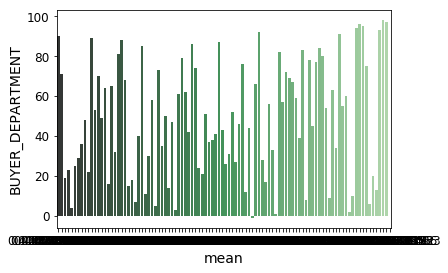

In [35]:
simple_describer_categorial(TX_data, "BUYER_DEPARTMENT")

In [36]:
temp=TX_data['IS_CLAIM'].groupby(TX_data["BUYER_DEPARTMENT"]).describe()

In [37]:
! pip install pygal_maps_fr

You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [38]:
from IPython.display import SVG, HTML
import pygal
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

line_chart = pygal.Line()
fr_chart = pygal.maps.fr.Departments()
fr_chart.title = 'Some departments'
fr_chart.add("mean",temp["mean"].to_dict())
fr_chart.render()
HTML(html_pygal.format(pygal_render=fr_chart.render()))

In [39]:
del temp

### BUYING_DATE             100000 non-null object


BUYING_DATE DESCRIBE    ____________________________________________

count     100000
unique        10
top       1/2017
freq       12499
Name: BUYING_DATE, dtype: object


BUYING_DATE STAT ____________________________________________

  BUYING_DATE    count      mean       std
0      1/2017  12499.0  0.527002  0.499290
5      5/2017  10248.0  0.523614  0.499466
6      6/2017   9657.0  0.514653  0.499811
9      9/2017  10087.0  0.508972  0.499944
2      2/2017   9433.0  0.508852  0.499948
8      8/2017   9990.0  0.497097  0.500017
4      4/2017   9119.0  0.496436  0.500015
3      3/2017   9423.0  0.492731  0.499974
7      7/2017  10983.0  0.492488  0.499966
1     10/2017   8561.0  0.422965  0.494059


BUYING_DATE MEAN     _____________________________________________



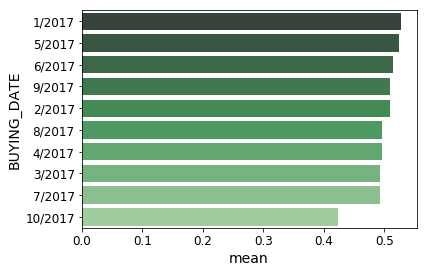

In [40]:
simple_describer_categorial(TX_data, "BUYING_DATE")

#### Analyse:

Variable à virer, c'est clair

### SELLER_SCORE_COUNT      99994 non-null object


SELLER_SCORE_COUNT DESCRIBE    ____________________________________________

count            99994
unique               5
top       10000<100000
freq             31104
Name: SELLER_SCORE_COUNT, dtype: object


SELLER_SCORE_COUNT STAT ____________________________________________

  SELLER_SCORE_COUNT    count      mean       std
4               <100   2085.0  0.694484  0.460736
3           100<1000   9539.0  0.598910  0.490145
2         1000<10000  30372.0  0.544877  0.497990
1       10000<100000  31104.0  0.492638  0.499954
0     100000<1000000  26894.0  0.408418  0.491550


SELLER_SCORE_COUNT MEAN     _____________________________________________



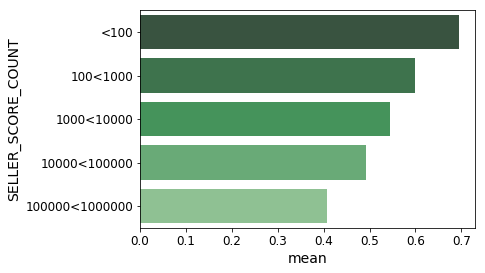

In [41]:
simple_describer_categorial(TX_data, "SELLER_SCORE_COUNT")

#### Analyse:

A notre grande surprise : les vendeurs bien notés ont moins de chance de faire des claims

### SELLER_SCORE_AVERAGE    99994 non-null float64


SELLER_SCORE_AVERAGE DESCRIBE    ____________________________________________

count    99994.000000
mean        45.850731
std          2.506009
min         10.000000
25%         45.000000
50%         46.000000
75%         47.000000
max         50.000000
Name: SELLER_SCORE_AVERAGE, dtype: float64


SELLER_SCORE_AVERAGE STAT ____________________________________________

    SELLER_SCORE_AVERAGE    count      mean       std
0                   10.0     66.0  1.000000  0.000000
13                  33.0     36.0  1.000000  0.000000
2                   13.0     17.0  1.000000  0.000000
3                   15.0      1.0  1.000000       NaN
5                   23.0      1.0  1.000000       NaN
6                   24.0     12.0  1.000000  0.000000
7                   25.0     14.0  1.000000  0.000000
8                   27.0      3.0  1.000000  0.000000
9                   28.0      5.0  1.000000  0.000000
1                   12.0      2.0  1.000000  0.000000
12                  32.0      8.0 

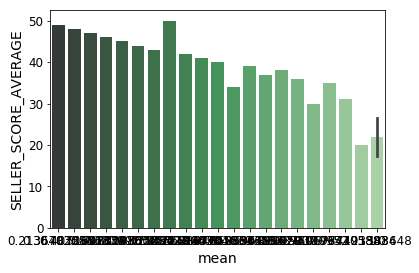

In [42]:
simple_describer_categorial(TX_data, "SELLER_SCORE_AVERAGE")

### SELLER_COUNTRY          100000 non-null object


SELLER_COUNTRY DESCRIBE    ____________________________________________

count                   100000
unique                      39
top       FRANCE, METROPOLITAN
freq                     57682
Name: SELLER_COUNTRY, dtype: object


SELLER_COUNTRY STAT ____________________________________________

                   SELLER_COUNTRY    count      mean       std
12                         GUYANA      2.0  1.000000  0.000000
7                         ESTONIA      2.0  1.000000  0.000000
11                         GREECE      1.0  1.000000       NaN
29                        ROMANIA      1.0  1.000000       NaN
6                          CYPRUS      1.0  1.000000       NaN
18                         JERSEY      6.0  0.833333  0.408248
25                     MARTINIQUE      6.0  0.833333  0.408248
23                       MALAYSIA     11.0  0.818182  0.404520
28                       PORTUGAL     16.0  0.750000  0.447214
20                  LIECHTENSTEIN     25.0  0.720000  0.458258
31    

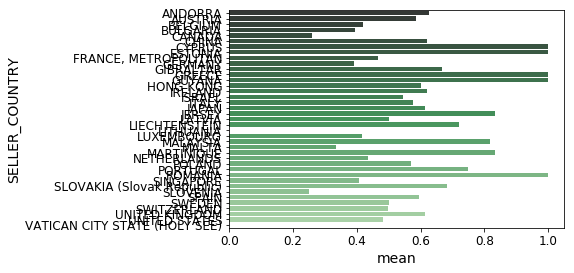

In [43]:
simple_describer_categorial(TX_data, "SELLER_COUNTRY")

#### Analyse:

Quelques pays à problèmes, mais pas forcément significatif à cause du faible nombre de ventes de certains.

Exemple : La grèce : une vente => une claim

### SELLER_DEPARTMENT       100000 non-null int64


SELLER_DEPARTMENT DESCRIBE    ____________________________________________

count    100000.000000
mean         32.670560
std          35.006913
min          -1.000000
25%          -1.000000
50%          22.000000
75%          70.000000
max          98.000000
Name: SELLER_DEPARTMENT, dtype: float64


SELLER_DEPARTMENT STAT ____________________________________________

    SELLER_DEPARTMENT    count      mean       std
72                 72   2803.0  0.704245  0.456463
19                 19     19.0  0.684211  0.477567
53                 53      3.0  0.666667  0.577350
71                 71    113.0  0.654867  0.477529
3                   3   1632.0  0.649510  0.477270
42                 42    258.0  0.624031  0.485314
90                 90    320.0  0.621875  0.485679
96                 96    188.0  0.617021  0.487411
45                 45   1681.0  0.610351  0.487816
44                 44   1394.0  0.603300  0.489388
52                 52    196.0  0.596939  0.491769
83               

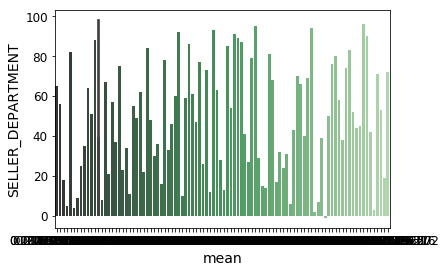

In [44]:
simple_describer_categorial(TX_data, "SELLER_DEPARTMENT")

In [45]:
temp=TX_data['IS_CLAIM'].groupby(TX_data["SELLER_DEPARTMENT"]).describe()

In [46]:
from IPython.display import SVG, HTML
import pygal
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

line_chart = pygal.Line()
fr_chart = pygal.maps.fr.Departments()
fr_chart.title = 'SELLER_DEPARTMENT'
fr_chart.add("mean",temp["mean"].to_dict())
fr_chart.render()
HTML(html_pygal.format(pygal_render=fr_chart.render()))


In [47]:
del temp

### Analyse

On remercie les Hautes Pyrénées qui ne font pas chier le monde : 18% de claims

Et la Sarthe qui ne va pas du tout

Des valeurs abhérantes comme d'habitude (les -1)

### PRODUCT_TYPE            100000 non-null object


PRODUCT_TYPE DESCRIBE    ____________________________________________

count     100000
unique       137
top        BOOKS
freq       21987
Name: PRODUCT_TYPE, dtype: object


PRODUCT_TYPE STAT ____________________________________________

                     PRODUCT_TYPE    count      mean       std
33                          CYCLE      5.0  1.000000  0.000000
89                 RADIO RECEPTOR      1.0  1.000000       NaN
99         SERVICES PRICEMINISTER      4.0  1.000000  0.000000
73                      MUSIC LOT      2.0  1.000000  0.000000
128                   VIDEO CARDS     48.0  0.937500  0.244623
88                      PROJECTOR     31.0  0.903226  0.300537
36                        DESKTOP     75.0  0.853333  0.356156
45                          FLASH     19.0  0.842105  0.374634
38                    DISK DRIVES     20.0  0.800000  0.410391
69                MEMORY ADAPTERS     15.0  0.800000  0.414039
124                            TV    128.0  0.781250  0.415023
134  

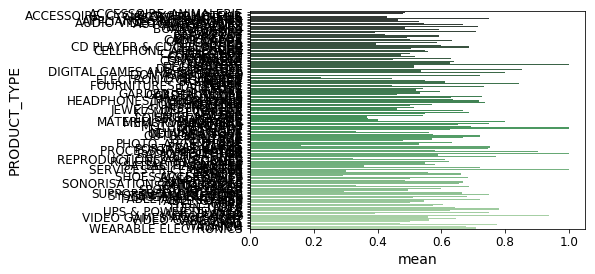

In [48]:
simple_describer_categorial(TX_data, "PRODUCT_TYPE")

### Analyse

Houuuu la belle dstribution jolie, il y a peût être une transformation judicieuse à faire. Dans tout les cas on garde

### PRODUCT_FAMILY          100000 non-null object


PRODUCT_FAMILY DESCRIBE    ____________________________________________

count          100000
unique             12
top       ELECTRONICS
freq            26258
Name: PRODUCT_FAMILY, dtype: object


PRODUCT_FAMILY STAT ____________________________________________

   PRODUCT_FAMILY    count      mean       std
6            HIFI   3824.0  0.589697  0.491953
2        CLOTHING   8961.0  0.579958  0.493593
3        COMPUTER   4297.0  0.579474  0.493701
0            BABY   3994.0  0.568853  0.495299
4     ELECTRONICS  26258.0  0.553698  0.497118
8           SPORT   3984.0  0.546687  0.497878
10          WHITE   8907.0  0.534972  0.498803
5           GAMES   6049.0  0.490164  0.499945
11           WINE    317.0  0.416404  0.493742
7           MUSIC   4785.0  0.406897  0.491307
9           VIDEO   6038.0  0.398145  0.489556
1           BOOKS  22586.0  0.393120  0.488454


PRODUCT_FAMILY MEAN     _____________________________________________



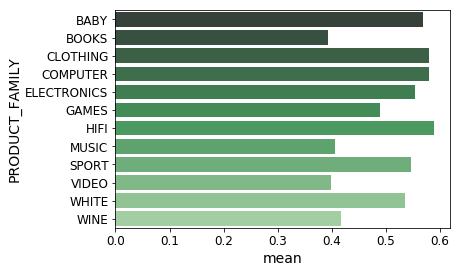

In [49]:
simple_describer_categorial(TX_data, "PRODUCT_FAMILY")

### Analyse

On voit clairement des zones à problème

### ITEM_PRICE              100000 non-null object


ITEM_PRICE DESCRIBE    ____________________________________________

count     100000
unique         8
top          <10
freq       52196
Name: ITEM_PRICE, dtype: object


ITEM_PRICE STAT ____________________________________________

  ITEM_PRICE    count      mean       std
1    100<500   8668.0  0.689663  0.462658
4   500<1000   1274.0  0.647567  0.477916
5     50<100   4524.0  0.631079  0.482566
0  1000<5000    119.0  0.596639  0.492646
3      20<50  14168.0  0.576087  0.494194
2      10<20  19050.0  0.511181  0.499888
6        <10  52196.0  0.429037  0.494943
7      >5000      1.0  0.000000       NaN


ITEM_PRICE MEAN     _____________________________________________



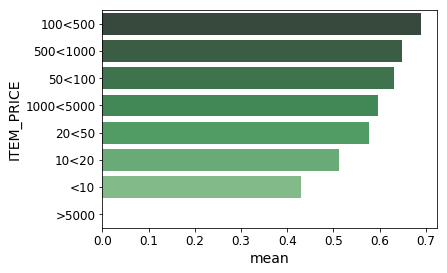

In [50]:
simple_describer_categorial(TX_data, "ITEM_PRICE")

### Analyse

Les petits montants font moins de claims. Logique

## Bilan

On voit clairement des trucs qui peuvent juste être flag "A Risque" comme les types de produits, ou les pays

Je propose de virer déjà les types de paiement. Ils ne se différentient pas entre eux.

Ainsi que la "BUYING_DATE", elle ne semble apporter rien du tout

In [51]:
TX_data.drop(['CARD_PAYMENT','COUPON_PAYMENT','RSP_PAYMENT','WALLET_PAYMENT', "BUYING_DATE"], axis = 1, inplace = True)

## Corrélation entre les variables numériques

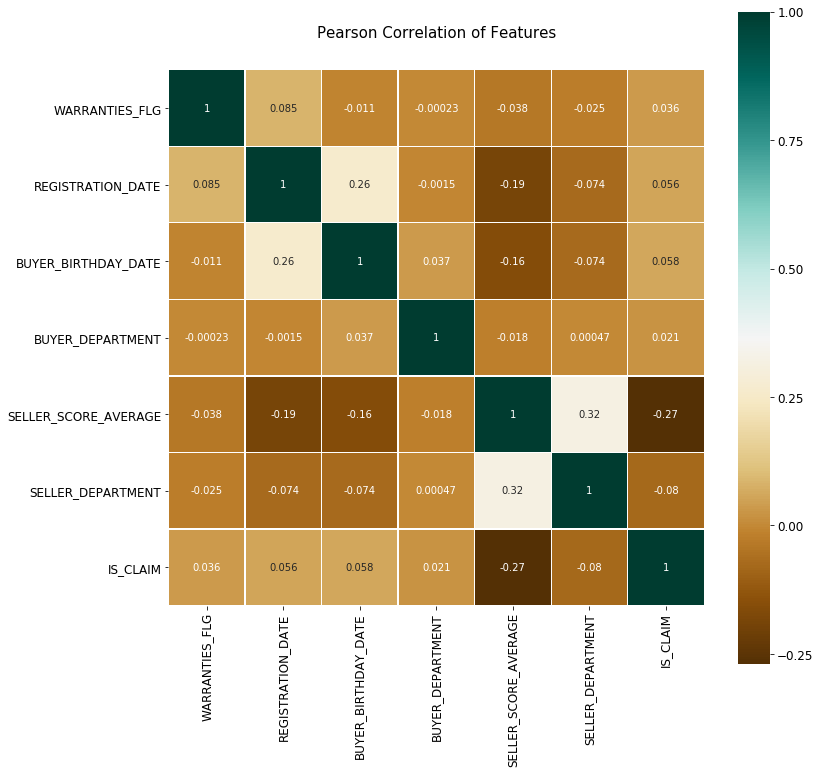

In [52]:
colormap = plt.cm.BrBG
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(TX_data.apply(pd.to_numeric, errors='ignore').select_dtypes(exclude=['object']).astype(float).corr(method='spearman'),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white',
            annot=True)

#### Analyse

Quelques corrélations linéaires:
1. Entre les dates de registration et d'anniversaire
2. Le score des vendeurs en fonction du département
3. Le score du vendeur et le taux de claim (logique)

La règle tacite est que:
* Une corélation en dessous de 0.10 n'est rien
* Entre 0.10 et 0.25 : Faible
* Moyenne entre 0.25 et 0.50
* Forte au dessus

Test de Spearman à vérifier les conditions initiales

In [53]:
cat_columns = TX_data.select_dtypes(['category']).columns
cat_columns
TX_data[cat_columns] = TX_data[cat_columns].apply(lambda x: x.cat.codes)

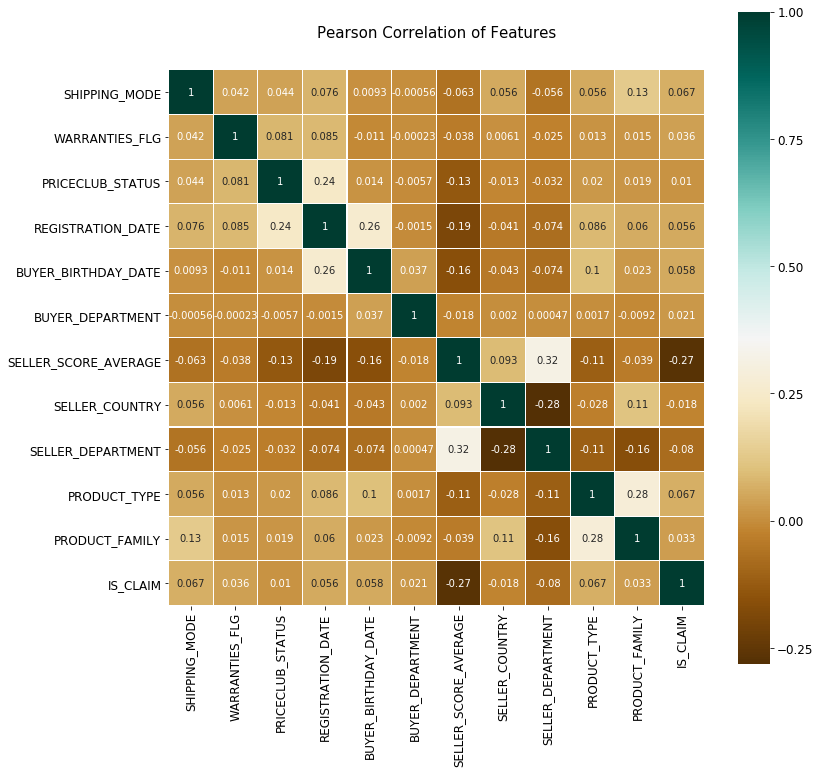

In [54]:
colormap = plt.cm.BrBG
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(TX_data.apply(pd.to_numeric, errors='ignore').select_dtypes(exclude=['object']).astype(float).corr(method='spearman'),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white',
            annot=True)

### Analyse:

Cool! Je ne vois rien

D'après le cours suivant, il faut bien dégager les variables corrélées pour utiliser des arbres de décisions (modèles linéaires, c'est évident) : http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/ml_ccc_machine_learning_interpretabilite.html

C'est pour ça que j'ai immédiatement dégagé la variable XXX_MAX que je construisait en même temps que XXX_MIN dans Splitter.

Et là, il faut choisir quoi virer